<a href="https://colab.research.google.com/github/k-atara/proyectoFinalEmtech/blob/main/ANALISIS_02_LopezVazquez_KimberlyAtara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Librerias necesarias 
import pandas as pd
import seaborn as sns

In [3]:
fileLocation = '/content/drive/My Drive/'
fileName = 'synergy_logistics_database.csv'
df = pd.read_csv(fileLocation + fileName, index_col='register_id')

df

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


# Rutas de importación y exportación

In [4]:
simpleDF = df[['direction', 'origin', 'destination', 'transport_mode', 'total_value']]
simpleDF

,direction,origin,destination,transport_mode,total_value
register_id,,,,,
1,Exports,Japan,China,Sea,33000000
2,Exports,Japan,China,Sea,16000000
3,Exports,Japan,China,Sea,29000000
4,Exports,Japan,China,Sea,14000000
5,Exports,Japan,China,Sea,17000000
...,...,...,...,...,...
19052,Imports,Japan,Singapore,Sea,1000000
19053,Imports,Malaysia,Singapore,Sea,2000000
19054,Imports,Malaysia,Singapore,Sea,33000000


In [5]:
rutasUnicas = simpleDF.groupby(['direction', 'origin', 'destination', 'transport_mode']).count()
rutasUnicas #multi-indice

total_value
direction origin               destination          transport_mode             
Exports   Australia            Brazil               Sea                     112
                               Mexico               Sea                      51
                               Philippines          Sea                     114
                               Singapore            Sea                     273
                               Thailand             Sea                     200
...                                                                         ...
Imports   USA                  Japan                Air                      22
                               Thailand             Sea                     109
          United Arab Emirates India                Sea                      20
          United Kingdom       Canada               Sea                      58
          Vietnam              United Arab Emirates Sea                      18

[215 rows x 1 columns]

In [6]:
rutasUnicas = rutasUnicas.rename(columns={'total_value': 'count'})
rutasUnicas #display() && display()

count
direction origin               destination          transport_mode       
Exports   Australia            Brazil               Sea               112
                               Mexico               Sea                51
                               Philippines          Sea               114
                               Singapore            Sea               273
                               Thailand             Sea               200
...                                                                   ...
Imports   USA                  Japan                Air                22
                               Thailand             Sea               109
          United Arab Emirates India                Sea                20
          United Kingdom       Canada               Sea                58
          Vietnam              United Arab Emirates Sea                18

[215 rows x 1 columns]

In [7]:
rutas = rutasUnicas.sort_values(by='count', ascending=False)
rutas.head(15)

count
direction origin         destination          transport_mode       
Exports   South Korea    Vietnam              Sea               497
          USA            Netherlands          Sea               436
          Netherlands    Belgium              Road              374
          China          Mexico               Air               330
          Japan          Brazil               Sea               306
          Germany        France               Road              299
          South Korea    Japan                Sea               279
Imports   Singapore      Thailand             Sea               273
Exports   Australia      Singapore            Sea               273
          Canada         Mexico               Rail              261
          China          Spain                Air               250
          Mexico         New Zealand          Sea               249
Imports   Germany        China                Sea               233
Exports   United Kingdom Belgium              Sea               229
          India          United Arab Emirates Sea               214

In [8]:
rutasExportaciones = rutas.xs('Exports')
rutasExportaciones

count
origin      destination    transport_mode       
South Korea Vietnam        Sea               497
USA         Netherlands    Sea               436
Netherlands Belgium        Road              374
China       Mexico         Air               330
Japan       Brazil         Sea               306
...                                          ...
France      Russia         Rail               13
Germany     United Kingdom Air                10
            Mexico         Air                 9
France      Austria        Rail                7
Netherlands Belgium        Sea                 1

[163 rows x 1 columns]

In [9]:
rutasExportaciones['nombre'] = rutasExportaciones.index.to_list()
rutasExportaciones

count                          nombre
origin      destination    transport_mode                                       
South Korea Vietnam        Sea               497     (South Korea, Vietnam, Sea)
USA         Netherlands    Sea               436         (USA, Netherlands, Sea)
Netherlands Belgium        Road              374    (Netherlands, Belgium, Road)
China       Mexico         Air               330            (China, Mexico, Air)
Japan       Brazil         Sea               306            (Japan, Brazil, Sea)
...                                          ...                             ...
France      Russia         Rail               13          (France, Russia, Rail)
Germany     United Kingdom Air                10  (Germany, United Kingdom, Air)
            Mexico         Air                 9          (Germany, Mexico, Air)
France      Austria        Rail                7         (France, Austria, Rail)
Netherlands Belgium        Sea                 1     (Netherlands, Belgium, Sea)

[163 rows x 2 columns]

In [10]:
def nombre(lista):
  nombre = f'{lista[0]} - {lista[1]}, {lista[2]}'
  return nombre

rutasExportaciones['nombre'] = rutasExportaciones['nombre'].apply(nombre)
rutasExportaciones

count                         nombre
origin      destination    transport_mode                                      
South Korea Vietnam        Sea               497     South Korea - Vietnam, Sea
USA         Netherlands    Sea               436         USA - Netherlands, Sea
Netherlands Belgium        Road              374    Netherlands - Belgium, Road
China       Mexico         Air               330            China - Mexico, Air
Japan       Brazil         Sea               306            Japan - Brazil, Sea
...                                          ...                            ...
France      Russia         Rail               13          France - Russia, Rail
Germany     United Kingdom Air                10  Germany - United Kingdom, Air
            Mexico         Air                 9          Germany - Mexico, Air
France      Austria        Rail                7         France - Austria, Rail
Netherlands Belgium        Sea                 1     Netherlands - Belgium, Sea

[163 rows x 2 columns]

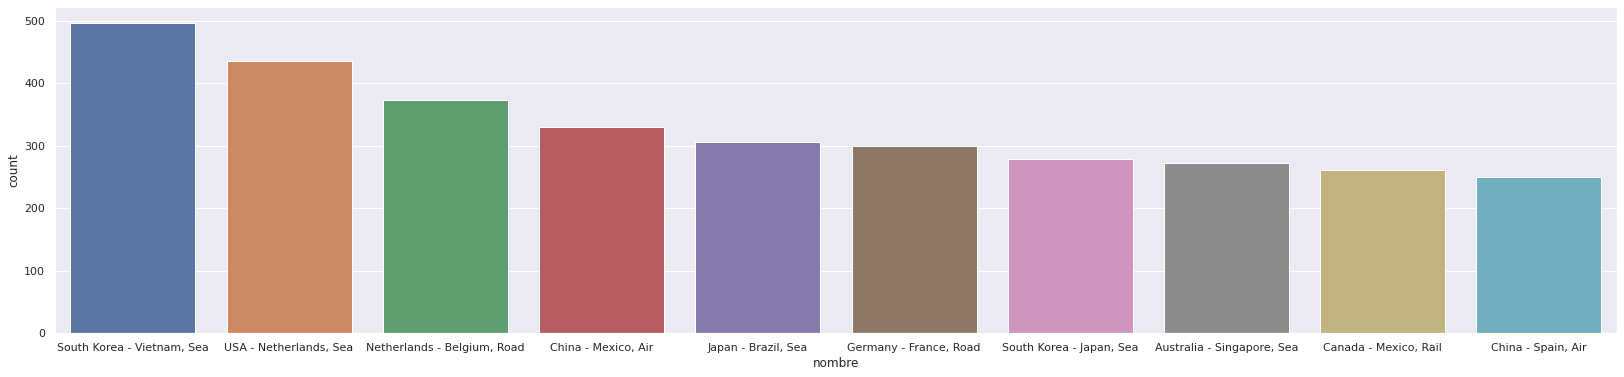

In [11]:
top_10 = rutasExportaciones.head(10)
sns.set(rc={"figure.figsize": (28, 6)})
sns.barplot(data=top_10, x='nombre', y='count')

In [12]:
rutasImportaciones = rutas.xs('Imports')
rutasImportaciones

,,,count
origin,destination,transport_mode,
Singapore,Thailand,Sea,273
Germany,China,Sea,233
China,Japan,Air,210
Japan,Mexico,Sea,206
Malaysia,Thailand,Rail,195
China,Thailand,Road,145
Spain,Germany,Road,142
China,United Arab Emirates,Sea,114
Brazil,China,Sea,113


In [13]:
rutasImportaciones['nombre'] = rutasImportaciones.index.to_list()
rutasImportaciones

,,,count,nombre
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"(Singapore, Thailand, Sea)"
Germany,China,Sea,233,"(Germany, China, Sea)"
China,Japan,Air,210,"(China, Japan, Air)"
Japan,Mexico,Sea,206,"(Japan, Mexico, Sea)"
Malaysia,Thailand,Rail,195,"(Malaysia, Thailand, Rail)"
China,Thailand,Road,145,"(China, Thailand, Road)"
Spain,Germany,Road,142,"(Spain, Germany, Road)"
China,United Arab Emirates,Sea,114,"(China, United Arab Emirates, Sea)"
Brazil,China,Sea,113,"(Brazil, China, Sea)"


In [14]:
rutasImportaciones['nombre'] = rutasImportaciones['nombre'].apply(nombre)
rutasImportaciones

,,,count,nombre
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"Singapore - Thailand, Sea"
Germany,China,Sea,233,"Germany - China, Sea"
China,Japan,Air,210,"China - Japan, Air"
Japan,Mexico,Sea,206,"Japan - Mexico, Sea"
Malaysia,Thailand,Rail,195,"Malaysia - Thailand, Rail"
China,Thailand,Road,145,"China - Thailand, Road"
Spain,Germany,Road,142,"Spain - Germany, Road"
China,United Arab Emirates,Sea,114,"China - United Arab Emirates, Sea"
Brazil,China,Sea,113,"Brazil - China, Sea"


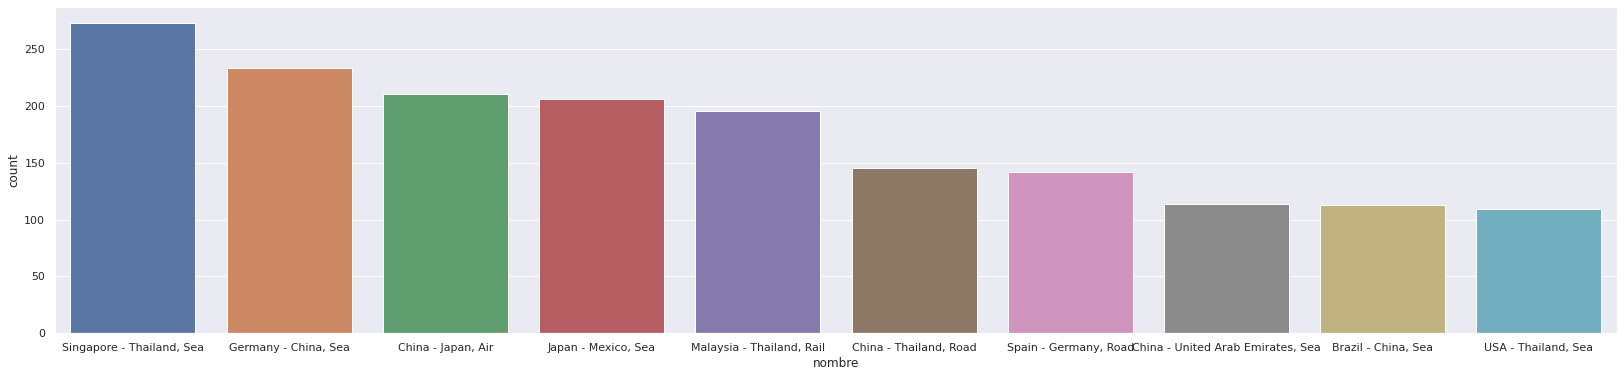

In [15]:
top_10 = rutasImportaciones.head(10)
sns.set(rc={"figure.figsize": (28, 6)})
sns.barplot(data=top_10, x='nombre', y='count')

In [16]:
resExp=rutasExportaciones.reset_index()
resImp=rutasImportaciones.reset_index()

In [17]:
resExp = resExp.drop('origin', axis='columns')
resExp= resExp.drop('destination', axis='columns')
resImp = resImp.drop('origin', axis='columns')
resImp= resImp.drop('destination', axis='columns')

In [18]:
rutasExportaciones

count                         nombre
origin      destination    transport_mode                                      
South Korea Vietnam        Sea               497     South Korea - Vietnam, Sea
USA         Netherlands    Sea               436         USA - Netherlands, Sea
Netherlands Belgium        Road              374    Netherlands - Belgium, Road
China       Mexico         Air               330            China - Mexico, Air
Japan       Brazil         Sea               306            Japan - Brazil, Sea
...                                          ...                            ...
France      Russia         Rail               13          France - Russia, Rail
Germany     United Kingdom Air                10  Germany - United Kingdom, Air
            Mexico         Air                 9          Germany - Mexico, Air
France      Austria        Rail                7         France - Austria, Rail
Netherlands Belgium        Sea                 1     Netherlands - Belgium, Sea

[163 rows x 2 columns]

In [19]:
resExp = resExp.groupby(['transport_mode']).sum().reset_index()
resExp

,transport_mode,count
0,Air,2045
1,Rail,2780
2,Road,2149
3,Sea,8434


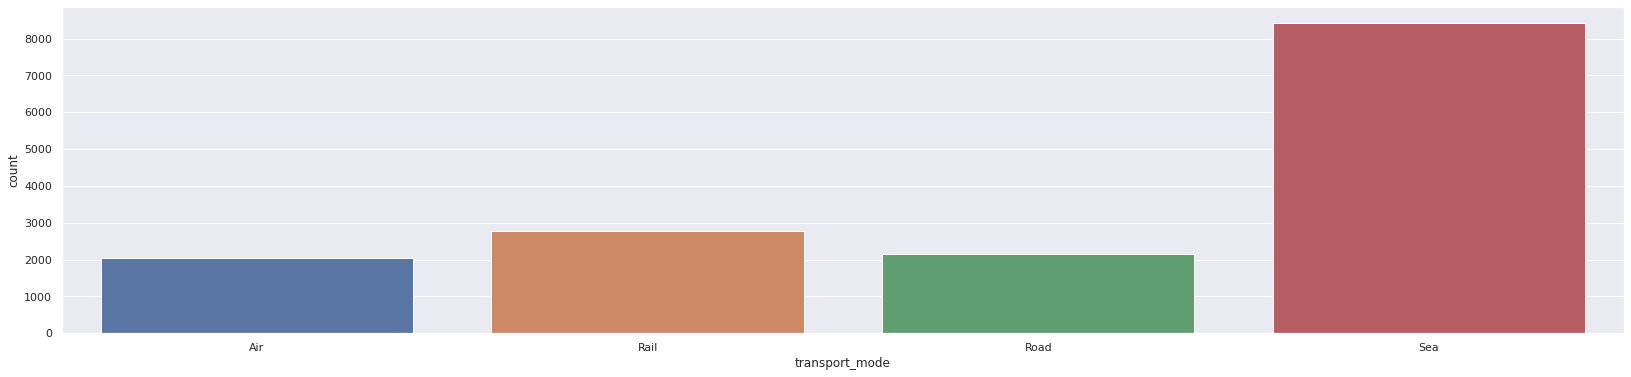

In [20]:
sns.set(rc={"figure.figsize": (28, 6)})
sns.barplot(data=resExp, x='transport_mode', y='count')

In [21]:
resImp = resImp.groupby(['transport_mode']).sum().reset_index()
resImp

,transport_mode,count
0,Air,344
1,Rail,601
2,Road,449
3,Sea,2254


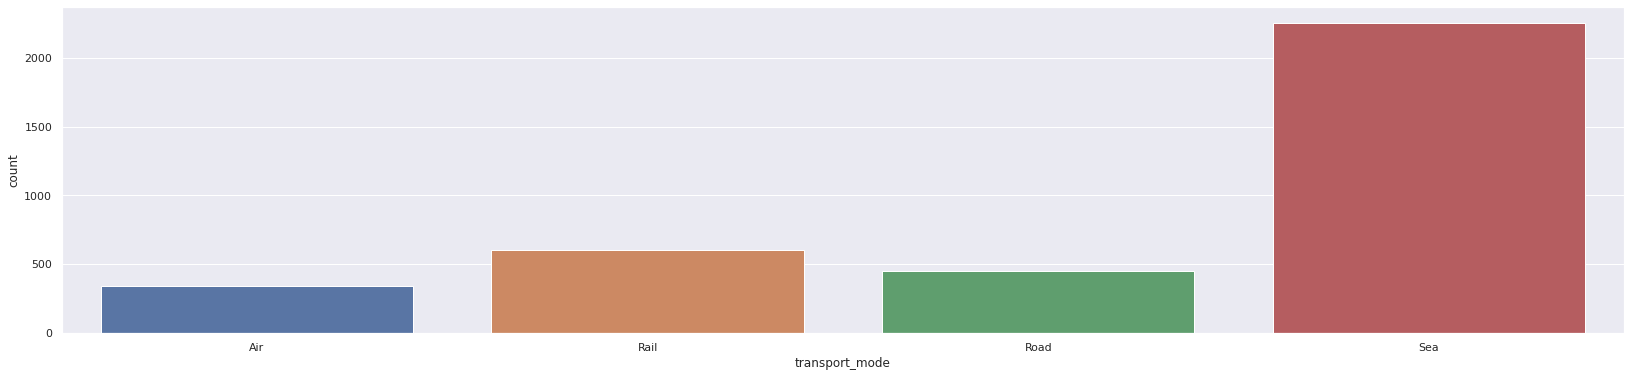

In [22]:
sns.set(rc={"figure.figsize": (28, 6)})
sns.barplot(data=resImp, x='transport_mode', y='count')

In [ ]:
rutasExportaciones

In [38]:
exp_80 = 80*rutasExportaciones.count()/100
exp_80

count     130.4
nombre    130.4
dtype: float64

In [51]:
res0 = rutasExportaciones.head(130)
res0

,,,count,nombre
origin,destination,transport_mode,,
South Korea,Vietnam,Sea,497,"South Korea - Vietnam, Sea"
USA,Netherlands,Sea,436,"USA - Netherlands, Sea"
Netherlands,Belgium,Road,374,"Netherlands - Belgium, Road"
China,Mexico,Air,330,"China - Mexico, Air"
Japan,Brazil,Sea,306,"Japan - Brazil, Sea"
...,...,...,...,...
Austria,France,Rail,32,"Austria - France, Rail"
USA,China,Sea,30,"USA - China, Sea"
Italy,Singapore,Rail,30,"Italy - Singapore, Rail"


In [45]:
import_80 = 80*rutasImportaciones.count()/100
import_80

count     41.6
nombre    41.6
dtype: float64

In [55]:
res1 = rutasImportaciones.head(41)
res1

,,,count,nombre
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,"Singapore - Thailand, Sea"
Germany,China,Sea,233,"Germany - China, Sea"
China,Japan,Air,210,"China - Japan, Air"
Japan,Mexico,Sea,206,"Japan - Mexico, Sea"
Malaysia,Thailand,Rail,195,"Malaysia - Thailand, Rail"
China,Thailand,Road,145,"China - Thailand, Road"
Spain,Germany,Road,142,"Spain - Germany, Road"
China,United Arab Emirates,Sea,114,"China - United Arab Emirates, Sea"
Brazil,China,Sea,113,"Brazil - China, Sea"


# Hago un merge de los dos dataframes, tanto de exportaciones como de importaciones y esos son los países en los que debería de enfocarse más

In [57]:
merged_inner = pd.merge(left=res0,right=res1, left_on='origin', right_on='origin')
merged_inner

,count_x,nombre_x,count_y,nombre_y
origin,,,,
South Korea,497,"South Korea - Vietnam, Sea",66,"South Korea - Mexico, Sea"
South Korea,497,"South Korea - Vietnam, Sea",51,"South Korea - United Arab Emirates, Sea"
South Korea,497,"South Korea - Vietnam, Sea",29,"South Korea - Germany, Air"
South Korea,279,"South Korea - Japan, Sea",66,"South Korea - Mexico, Sea"
South Korea,279,"South Korea - Japan, Sea",51,"South Korea - United Arab Emirates, Sea"
...,...,...,...,...
Spain,53,"Spain - Belgium, Sea",41,"Spain - Mexico, Sea"
Spain,52,"Spain - Germany, Rail",142,"Spain - Germany, Road"
Spain,52,"Spain - Germany, Rail",41,"Spain - Mexico, Sea"


In [62]:
paises = df.loc[:, 'origin'] 

In [63]:
paises.drop_duplicates()

register_id
1                       Japan
153                   Germany
292                     China
1012                    Italy
1245                      USA
2002                   Russia
3762              South Korea
5092              Netherlands
5538                   France
6202                   Canada
6805                  Belgium
7048                    Spain
7343                    India
7908           United Kingdom
9214                Australia
10077                  Brazil
10473             Switzerland
10722                  Mexico
14040                 Austria
14477               Singapore
16219                 Vietnam
16237                Malaysia
17125    United Arab Emirates
Name: origin, dtype: object

Descargar los resultados

In [24]:
#Convertimos el DataFrame a un archivo .csv
res.to_csv('res.csv')
#Finalmente descargamos el archivo
from google.colab import files
files.download("res.csv")

NameError: ignored